# Libraries

In [1]:
import matplotlib

matplotlib.use("TkAgg")
import gym
import gridworld
from gym import wrappers, logger
from collections import defaultdict

import ast
import numpy as np

np.random.seed(3)

# Setting up

In [2]:
### create the env
env = gym.make("gridworld-v0")

# Init the seed  ( pseudo random )
env.seed(0)

# getting dictionary of states WITHOUT MDP OF COURSE
statedic , _ = env.getMDP()
statedic_int2str = {v:k for k,v in statedic.items() }

# Utils

In [3]:

###################     Highly abstract policy class! #######################
class Policy(object):
    
    def __init__(self):
        """ Nothing is required for to construct an abstract policy class """
        pass
    
    def get_action_value(self):
        "Must be redefined"
        raise NotImplementedError
        
############################################################################


###################                Uniform            #######################
class Uniform_Policy(Policy):

    def get_action_value(self , Q_state ):
        """ Q_values numpy array for a given state  size ( number of actions ) """
        action = np.random.randint (Q_state.size)
        return action , Q_state[action]

############################################################################

###################                Greedy            #######################
class Greedy_Policy(Policy):

    
    def get_action_value(self , Q_state):
        action = Q_state.argmax()
        return action , Q_state[action]

############################################################################

###################             ε-Greedy            #######################
class Epsilon_Greedy_Policy(Policy):
    
    def __init__(self , eps=0.1 , decay=1.0 ):  
        self.eps      = eps
        self.decay = 1.0
                    
    def get_action_value(self , Q_state ):
        
        if ( np.random.rand() < (self.eps*self.decay) ):
            action = np.random.choice ( Q_state.size )
        else :
            action = Q_state.argmax()
    
        return action , Q_state[action]

############################################################################

In [4]:
def make_policy ( name="Epsilon_Greedy" , params={ "eps":0.1 , "decay":1.0 } ) :
    
    if   ( name=="Uniform" ): return Uniform_Policy()
    elif ( name=="Greedy" ) : return Greedy_Policy()
    elif ( name=="Epsilon_Greedy" ) : return Epsilon_Greedy_Policy(**params)
    else : 
        raise Exception("Unknown policy")

In [5]:
p = make_policy( name="Epsilon_Greedy" )

In [6]:
p.get_action_value(np.array([0.1,0.2,0.4,0.3]))

(2, 0.4)

## Algorithms

**Basic Q-learning ( Off-policy ) :**

<img src="./algo imgs/Q-learning.PNG">

In [7]:
def Q_learning ( env , terminal_states=[1,5] , nbr_epsds=1000 , lr=0.1 , discount=0.99 , behavior_policy="Epsilon_Greedy" ,
                 policy_params={ "eps":0.1 , "decay":1.0 } , verbose=True   ):
    

    # ENCONDING Purpose : getting dictionary of states WITHOUT MDP OF COURSE
    statedic , _ = env.getMDP()

    # init
    Q = np.random.rand(env.nS,env.nA)
    Q[terminal_states] = 0
    
    # behavior_policy  
    behavior_policy  = make_policy ( "Epsilon_Greedy" , policy_params )
    
    # Updating Policy  : Greedy   MAX Q ( S , A )
    update_policy  = make_policy ( "Greedy" )
    
    
    for episode in range(nbr_epsds) : 
        if ( verbose ) : print("episode ",episode+1)
        #  initial state 
        S = env.reset()
        # Convert to an index : array ==> str ==> index 
        S =  statedic [env.state2str( S ) ] 
        
        # for step in episode
        steps = 0 
        while(True) :
            
            A = behavior_policy.get_action_value( Q[S] )[0]
            next_S, R ,done, _ = env.step( A )
            next_S =  statedic [ env.state2str( next_S ) ]
            # look_up
            lookup_Q  = R + discount *  update_policy.get_action_value( Q[next_S] )[1]
            curr_Q =  Q[S,A]
            # Update
            Q[S,A] += lr * ( lookup_Q - curr_Q )
            
            if ( done ) :
                if ( verbose ) : print ("number of steps : ", steps+1)
                break 
                
            S = next_S
            steps += 1 
            
                

In [8]:
Q_learning(env)

episode  1
number of steps :  35
episode  2
number of steps :  2
episode  3
number of steps :  96
episode  4
number of steps :  44
episode  5
number of steps :  28
episode  6
number of steps :  89
episode  7
number of steps :  17
episode  8
number of steps :  118
episode  9
number of steps :  21
episode  10
number of steps :  53
episode  11
number of steps :  1
episode  12
number of steps :  38
episode  13
number of steps :  13
episode  14
number of steps :  71
episode  15
number of steps :  11
episode  16
number of steps :  17
episode  17
number of steps :  5
episode  18
number of steps :  16
episode  19
number of steps :  142
episode  20
number of steps :  20
episode  21
number of steps :  37
episode  22
number of steps :  40
episode  23
number of steps :  9
episode  24
number of steps :  38
episode  25
number of steps :  10
episode  26
number of steps :  19
episode  27
number of steps :  73
episode  28
number of steps :  26
episode  29
number of steps :  295
episode  30
number of st

number of steps :  17
episode  564
number of steps :  13
episode  565
number of steps :  20
episode  566
number of steps :  21
episode  567
number of steps :  10
episode  568
number of steps :  4
episode  569
number of steps :  9
episode  570
number of steps :  19
episode  571
number of steps :  16
episode  572
number of steps :  13
episode  573
number of steps :  18
episode  574
number of steps :  29
episode  575
number of steps :  25
episode  576
number of steps :  12
episode  577
number of steps :  15
episode  578
number of steps :  14
episode  579
number of steps :  34
episode  580
number of steps :  10
episode  581
number of steps :  41
episode  582
number of steps :  12
episode  583
number of steps :  28
episode  584
number of steps :  27
episode  585
number of steps :  11
episode  586
number of steps :  14
episode  587
number of steps :  26
episode  588
number of steps :  9
episode  589
number of steps :  21
episode  590
number of steps :  22
episode  591
number of steps :  16
e

number of steps :  22
episode  958
number of steps :  12
episode  959
number of steps :  15
episode  960
number of steps :  36
episode  961
number of steps :  25
episode  962
number of steps :  16
episode  963
number of steps :  37
episode  964
number of steps :  19
episode  965
number of steps :  12
episode  966
number of steps :  12
episode  967
number of steps :  14
episode  968
number of steps :  14
episode  969
number of steps :  14
episode  970
number of steps :  10
episode  971
number of steps :  29
episode  972
number of steps :  25
episode  973
number of steps :  3
episode  974
number of steps :  38
episode  975
number of steps :  27
episode  976
number of steps :  3
episode  977
number of steps :  10
episode  978
number of steps :  13
episode  979
number of steps :  11
episode  980
number of steps :  14
episode  981
number of steps :  23
episode  982
number of steps :  3
episode  983
number of steps :  16
episode  984
number of steps :  17
episode  985
number of steps :  16
e

**Sarsa ( On-policy ) :**

<img src="./algo imgs/Sarsa.PNG">

In [9]:
def Sarsa ( env , terminal_states=[1,5] , nbr_epsds=1000 , lr=0.1 , discount=0.99 , behavior_policy="Epsilon_Greedy" ,
                 policy_params={ "eps":0.1 , "decay":1.0 } , verbose=True   ):
    

    # ENCONDING Purpose : getting dictionary of states WITHOUT MDP OF COURSE
    statedic , _ = env.getMDP()

    # init
    Q = np.random.rand(env.nS,env.nA)
    Q[terminal_states] = 0
    
    # behavior_policy  
    behavior_policy  = make_policy ( "Epsilon_Greedy" , policy_params )
    
    # =========> Updating Policy  same as Behavior policy  ( THE ONLY DIFFERENCE )
    update_policy  = behavior_policy
    
    
    for episode in range(nbr_epsds) : 
        if ( verbose ) : print("episode ",episode+1)
        #  initial state 
        S = env.reset()
        # Convert to an index : array ==> str ==> index 
        S =  statedic [env.state2str( S ) ] 
        
        # for step in episode
        steps = 0 
        while(True) :
            
            A = behavior_policy.get_action_value( Q[S] )[0]
            next_S, R ,done, _ = env.step( A )
            next_S =  statedic [ env.state2str( next_S ) ]
            # look_up
            lookup_Q  = R + discount *  update_policy.get_action_value( Q[next_S] )[1]
            curr_Q =  Q[S,A]
            # Update
            Q[S,A] += lr * ( lookup_Q - curr_Q )
            
            if ( done ) :
                if ( verbose ) : print ("number of steps : ", steps+1)
                break 
                
            S = next_S
            steps += 1 
            
                

In [10]:
Sarsa(env)

episode  1
number of steps :  78
episode  2
number of steps :  5
episode  3
number of steps :  13
episode  4
number of steps :  42
episode  5
number of steps :  2
episode  6
number of steps :  1
episode  7
number of steps :  17
episode  8
number of steps :  190
episode  9
number of steps :  17
episode  10
number of steps :  84
episode  11
number of steps :  14
episode  12
number of steps :  10
episode  13
number of steps :  19
episode  14
number of steps :  56
episode  15
number of steps :  7
episode  16
number of steps :  28
episode  17
number of steps :  254
episode  18
number of steps :  98
episode  19
number of steps :  69
episode  20
number of steps :  60
episode  21
number of steps :  230
episode  22
number of steps :  44
episode  23
number of steps :  54
episode  24
number of steps :  16
episode  25
number of steps :  10
episode  26
number of steps :  1
episode  27
number of steps :  105
episode  28
number of steps :  4
episode  29
number of steps :  78
episode  30
number of ste

number of steps :  11
episode  405
number of steps :  14
episode  406
number of steps :  15
episode  407
number of steps :  14
episode  408
number of steps :  9
episode  409
number of steps :  4
episode  410
number of steps :  12
episode  411
number of steps :  8
episode  412
number of steps :  9
episode  413
number of steps :  1
episode  414
number of steps :  9
episode  415
number of steps :  8
episode  416
number of steps :  13
episode  417
number of steps :  26
episode  418
number of steps :  4
episode  419
number of steps :  6
episode  420
number of steps :  10
episode  421
number of steps :  1
episode  422
number of steps :  8
episode  423
number of steps :  3
episode  424
number of steps :  1
episode  425
number of steps :  10
episode  426
number of steps :  10
episode  427
number of steps :  10
episode  428
number of steps :  12
episode  429
number of steps :  14
episode  430
number of steps :  9
episode  431
number of steps :  1
episode  432
number of steps :  11
episode  433


number of steps :  25
episode  679
number of steps :  11
episode  680
number of steps :  9
episode  681
number of steps :  14
episode  682
number of steps :  10
episode  683
number of steps :  25
episode  684
number of steps :  27
episode  685
number of steps :  10
episode  686
number of steps :  25
episode  687
number of steps :  29
episode  688
number of steps :  8
episode  689
number of steps :  11
episode  690
number of steps :  1
episode  691
number of steps :  10
episode  692
number of steps :  11
episode  693
number of steps :  10
episode  694
number of steps :  9
episode  695
number of steps :  13
episode  696
number of steps :  27
episode  697
number of steps :  14
episode  698
number of steps :  11
episode  699
number of steps :  14
episode  700
number of steps :  38
episode  701
number of steps :  12
episode  702
number of steps :  13
episode  703
number of steps :  10
episode  704
number of steps :  9
episode  705
number of steps :  9
episode  706
number of steps :  12
epis

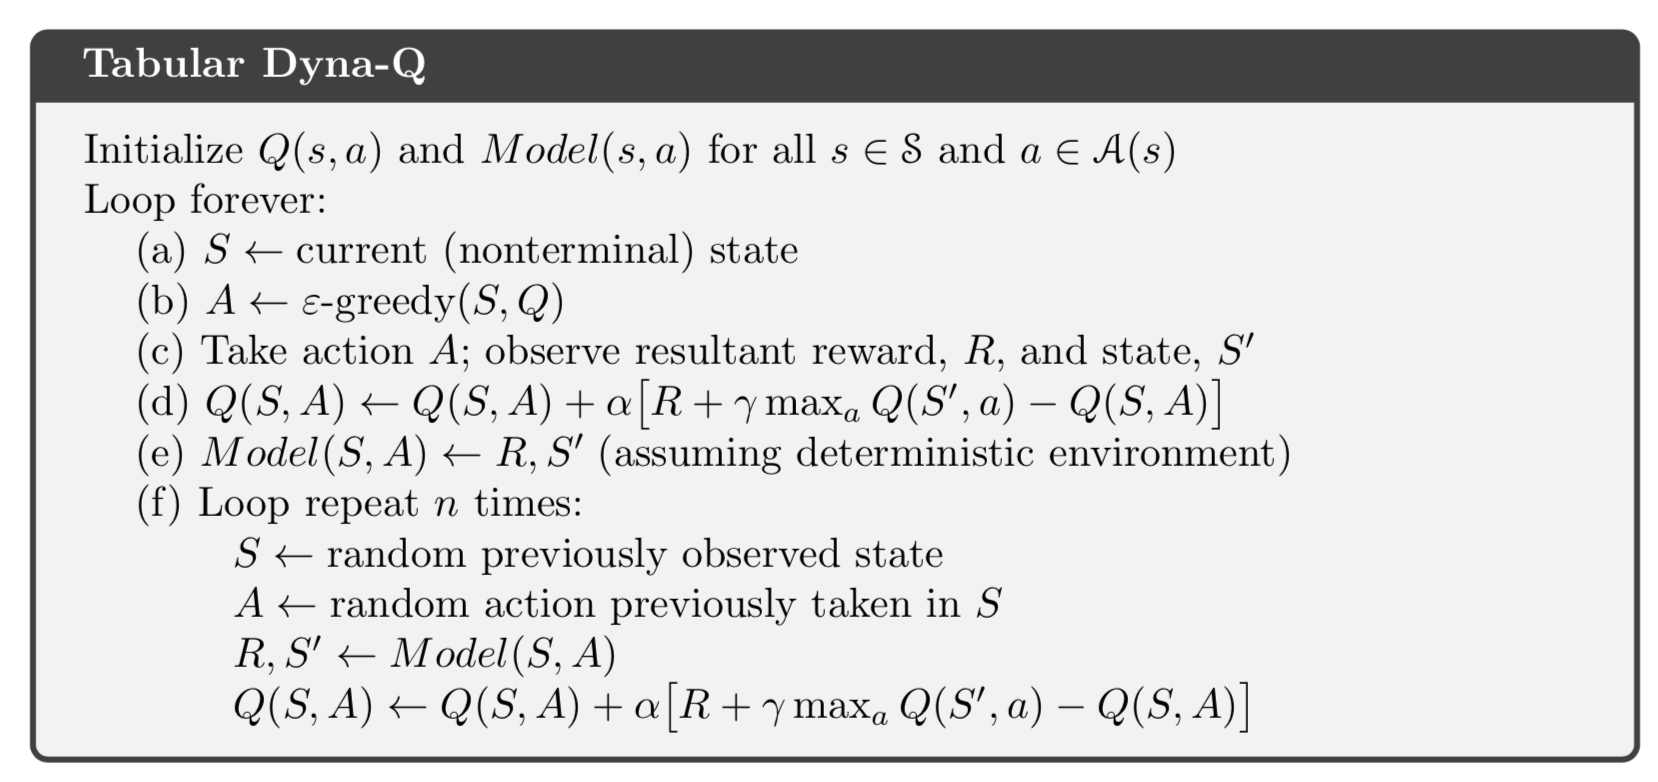

**Dyna-Q : Hybrid Model**
- **Model-based**  : Approximating Rewards , and Transitions between states through experience 
- **Model Free  (Value-Based)** : "Q-learning"  Approximating Q-values through experience

<img src="./algo imgs/Dyna-Q.PNG">

In [11]:
class Model(object):
    
    def __init__( self , alpha_m , nS ):
        
        self.nS      = nS
        self.alpha_m = alpha_m
        
        # A dictionary that maps (state,action) -> array [ reward_s1 , reward_s2 , ... , reward_nS ] : init Randomly 
        self.rewards     = defaultdict(lambda: np.random.rand(nS).astype(np.float32) )
        # A dictionary that maps (state,action) ->  : array P(s_next/s,a)   : init Uniformly 
        self.transitions = defaultdict(lambda: np.ones(nS,dtype=np.float32)*(1/nS) )
        
    def update( self , S , A , next_S , R ):
        # learning reward
        self.rewards[(S,A)][next_S] += self.alpha_m *( R - self.rewards[(S,A)][next_S] )
        
        # Learning transitions  : vectorized
        mask_arr = np.zeros(self.nS,dtype=np.float32)
        mask_arr[next_S] = 1 
        self.transitions[(S,A)] += self.alpha_m * ( mask_arr - np.array(self.transitions[(S,A)]) )
        
        
    def get_reward_proba ( self , S , A ) : 
        # Ex : proba array [0.1,0.2,0.6,0.1] ==cumsum==> array([0.1, 0.3, 0.9, 1. ])
        #  ==> argmax (picked the first element) verfying condition   (picked_number > element)
        next_S = np.argmax( self.transitions[(S,A)].cumsum() > np.random.rand() )
        
        return next_S , self.rewards[(S,A)][next_S] , self.transitions[(S,A)][next_S]

In [12]:
def Dyna_Q ( env , terminal_states=[1,5] , nbr_epsds=1000 ,  n_sampling=5 , lr=0.1 , lr_m=0.1 , discount=0.99 , behavior_policy="Epsilon_Greedy" ,
             policy_params={ "eps":0.1 , "decay":1.0 } , verbose=True  ) :
    
    # ENCONDING Purpose : getting dictionary of states WITHOUT THE MDP OF COURSE
    statedic , _ = env.getMDP()
    
    # init
    ## Q init 
    Q = np.random.rand(env.nS,env.nA)
    Q[terminal_states] = 0
    ## Model init
    model = Model (lr_m , env.nS)
    
    # behavior_policy  
    behavior_policy  = make_policy ( "Epsilon_Greedy" , policy_params )
    # Updating Policy  : Greedy   MAX Q ( S , A )
    update_policy  = make_policy ( "Greedy" )
    
    # loop forever 
    for episode in range(nbr_epsds) : 
        if ( verbose ) : print("episode ",episode+1)
        #  initial state 
        S = env.reset()
        # Convert to an index : array ==> str ==> index 
        S =  statedic [env.state2str( S )] 
        
        # Q-learning
        A = behavior_policy.get_action_value( Q[S] )[0]
        next_S, R ,done, _ = env.step( A )
        next_S =  statedic [ env.state2str( next_S ) ]
        lookup_Q  = R + discount *  update_policy.get_action_value( Q[next_S] )[1]
        curr_Q =  Q[S,A]
        Q[S,A] += lr * ( lookup_Q - curr_Q )
            
        
        # Model update 
        model.update ( S , A , next_S , R )
        
        for n in range(n_sampling) : 
            # Sample randomly : Random Strategy S,A
            S,A = np.random.choice(env.nS) , np.random.choice(env.nA)
            # get reward and proba 
            next_S , R , proba  = model.get_reward_proba(S,A)
            # update one-step tabular learning 
            lookup_Q  = R + discount *  update_policy.get_action_value( Q[next_S] )[1]
            curr_Q =  Q[S,A]
            Q[S,A] += lr * ( lookup_Q - curr_Q )          

# Agents (for a better code architecture) 

transform the previous algorithms to agent classes 

In [13]:
class Q_learning_Agent(object):
    """An agent using a deterministic policy generated by Policy Iteration Algorithm !"""
    
    def __init__(self, env, behavior_policy, terminal_states=[1,5], lr=0.1, discount=0.99 ):
        

        # hyper params and env
        self.lr = lr 
        self.discount = discount
        self.env = env
        
        #Q
        self.Q = np.random.rand(env.nS,env.nA)
        self.Q[terminal_states] = 0
        
        # behavior_policy  
        self.behavior_policy  = behavior_policy
        # Updating Policy  : Greedy   MAX Q ( S , A )
        self.update_policy  = make_policy ( "Greedy" )
        
        # ENCONDING Purpose : getting dictionary of states WITHOUT MDP OF COURSE
        self.statedic , _ = env.getMDP()
        
        

                        
    def act(self, observation):
        # return next action to play
        return self.behavior_policy.get_action_value(self.Q[observation])[0]
    
    
    def update(self, S, A, next_S, R):        
        # look_up
        lookup_Q  = R + self.discount *  self.update_policy.get_action_value( self.Q[next_S] )[1]
        curr_Q =  self.Q[S,A]
        # Update
        self.Q[S,A] += self.lr * ( lookup_Q - curr_Q )

In [14]:
class Sarsa_Agent(Q_learning_Agent) :
    
    def __init__(self, env, behavior_policy, terminal_states=[1,5], lr=0.1, discount=0.99):
        super().__init__(env, behavior_policy, terminal_states=[1,5], lr=0.1, discount=0.99)
        self.update_policy = behavior_policy

In [15]:
class Dyna_Q_Agent(Q_learning_Agent):
    
    def __init__(self, env, behavior_policy, terminal_states=[1,5],
                 n_sampling=5, lr=0.1, lr_m=0.1, discount=0.99):
        
        # Q_learning part init 
        super().__init__(env, behavior_policy, terminal_states=[1,5], lr=0.1, discount=0.99)
        ## Model init
        self.model = Model (lr_m , env.nS)
        ## params init
        self.n_sampling = n_sampling
        self.nS,self.nA = env.nS,env.nA
        
    def update(self, S, A, next_S, R):
        # Q learning update 
        super().update(S, A, next_S, R)
        # Model based update 
        self.model.update ( S , A , next_S , R )
        
        # hybrid update ==> sampling using model and updating Q values 
        for n in range(self.n_sampling) : 
            # Sample randomly : Random Strategy S,A
            S,A = np.random.choice(self.nS) , np.random.choice(self.nA)
            # get reward and proba 
            next_S , R , proba  = self.model.get_reward_proba(S,A)
            super().update(S, A, next_S, R)  

# training

# Q learning (off policy)

In [16]:
# log file plusieurs scenarios
outdir = 'gridworld-v0/Q_learning_Agent-results'
envm = wrappers.Monitor(env, directory=outdir, force=True , video_callable=False )
env.setPlan("gridworldPlans/plan4.txt", {0: -0.1, 3: 1, 4: 1, 5: -1, 6: -1})
env.seed()  # randomness init
statedic , _ = env.getMDP()

################## AGENT ################## 
p = make_policy ( "Epsilon_Greedy" , params={ "eps":0.1 } )
agent = Q_learning_Agent( envm, behavior_policy=p)
###########################################

episode_count = 1000
FPS = 0.0001
q_learning_nbr_actions = []
q_learning_avg_rewards = []
for i in range(episode_count):
    #  initial state 
    S = envm.reset()
    # Convert to an index : array ==> str ==> index 
    S =  statedic [env.state2str( S )]
    
    env.verbose = (i % 100 == 0 and i > 0)  # render 1 episode / 100
    if env.verbose:
        env.render(FPS)
    j = 0
    rsum = 0
    while True:
        action = agent.act(S)
        obs, reward, done, _ = envm.step(action)
        next_S = statedic [ env.state2str( obs ) ]
        agent.update(S, action, next_S, reward)
        ##### logs ##########
        rsum += reward
        j += 1
        if env.verbose:
            env.render(FPS)
        if done:
            print("Episode : " + str(i) + " rsum=" + str(rsum) + ", " + str(j) + " actions")
            q_learning_nbr_actions.append(j)
            q_learning_avg_rewards.append(rsum/j)
            break
        
        S = next_S

print("done")
env.close()

Episode : 0 rsum=-101.9999999999986, 1001 actions
Episode : 1 rsum=-101.99999999999854, 1001 actions
Episode : 2 rsum=-101.99999999999852, 1001 actions
Episode : 3 rsum=-101.99999999999854, 1001 actions
Episode : 4 rsum=-101.99999999999852, 1001 actions
Episode : 5 rsum=-101.99999999999854, 1001 actions
Episode : 6 rsum=-101.99999999999854, 1001 actions
Episode : 7 rsum=-101.99999999999854, 1001 actions
Episode : 8 rsum=-94.19999999999887, 944 actions
Episode : 9 rsum=-101.99999999999852, 1001 actions
Episode : 10 rsum=-101.99999999999852, 1001 actions
Episode : 11 rsum=-60.900000000000595, 611 actions
Episode : 12 rsum=-66.40000000000045, 666 actions
Episode : 13 rsum=-101.99999999999852, 1001 actions
Episode : 14 rsum=-101.9999999999986, 1001 actions
Episode : 15 rsum=-101.9999999999986, 1001 actions
Episode : 16 rsum=-101.99999999999852, 1001 actions
Episode : 17 rsum=-63.5000000000006, 637 actions
Episode : 18 rsum=-101.99999999999852, 1001 actions
Episode : 19 rsum=-47.00000000000

Episode : 200 rsum=-4.499999999999996, 47 actions
Episode : 201 rsum=-10.19999999999998, 104 actions
Episode : 202 rsum=-5.199999999999994, 54 actions
Episode : 203 rsum=-2.9000000000000017, 31 actions
Episode : 204 rsum=-18.800000000000015, 190 actions
Episode : 205 rsum=-14.699999999999964, 149 actions
Episode : 206 rsum=-7.899999999999988, 81 actions
Episode : 207 rsum=-46.400000000000404, 466 actions
Episode : 208 rsum=-3.1000000000000014, 33 actions
Episode : 209 rsum=-7.499999999999986, 77 actions
Episode : 210 rsum=-4.399999999999997, 46 actions
Episode : 211 rsum=-44.90000000000038, 451 actions
Episode : 212 rsum=-4.699999999999995, 49 actions
Episode : 213 rsum=-7.399999999999988, 76 actions
Episode : 214 rsum=-7.39999999999999, 76 actions
Episode : 215 rsum=-4.399999999999997, 46 actions
Episode : 216 rsum=-4.699999999999995, 49 actions
Episode : 217 rsum=-3.8999999999999986, 41 actions
Episode : 218 rsum=-2.800000000000002, 30 actions
Episode : 219 rsum=-9.799999999999981, 1

Episode : 400 rsum=-4.299999999999997, 45 actions
Episode : 401 rsum=-3.4000000000000004, 36 actions
Episode : 402 rsum=-4.999999999999995, 52 actions
Episode : 403 rsum=-3.1000000000000014, 33 actions
Episode : 404 rsum=-2.800000000000002, 30 actions
Episode : 405 rsum=-2.900000000000002, 31 actions
Episode : 406 rsum=-2.4000000000000017, 26 actions
Episode : 407 rsum=-3.5999999999999996, 38 actions
Episode : 408 rsum=-3.9999999999999982, 42 actions
Episode : 409 rsum=-4.699999999999996, 49 actions
Episode : 410 rsum=-3.5999999999999996, 38 actions
Episode : 411 rsum=-5.099999999999993, 53 actions
Episode : 412 rsum=-4.7999999999999945, 50 actions
Episode : 413 rsum=-2.600000000000002, 28 actions
Episode : 414 rsum=-2.700000000000002, 29 actions
Episode : 415 rsum=-3.3000000000000007, 35 actions
Episode : 416 rsum=-3.200000000000001, 34 actions
Episode : 417 rsum=-3.6999999999999993, 39 actions
Episode : 418 rsum=-2.600000000000002, 28 actions
Episode : 419 rsum=-3.200000000000001, 34

Episode : 600 rsum=-2.900000000000002, 31 actions
Episode : 601 rsum=-2.800000000000002, 30 actions
Episode : 602 rsum=-2.4000000000000017, 26 actions
Episode : 603 rsum=-4.599999999999996, 48 actions
Episode : 604 rsum=-3.1000000000000014, 33 actions
Episode : 605 rsum=-3.799999999999999, 40 actions
Episode : 606 rsum=-2.4000000000000017, 26 actions
Episode : 607 rsum=-2.700000000000002, 29 actions
Episode : 608 rsum=-3.5999999999999996, 38 actions
Episode : 609 rsum=-3.4000000000000004, 36 actions
Episode : 610 rsum=-3.799999999999999, 40 actions
Episode : 611 rsum=-3.200000000000001, 34 actions
Episode : 612 rsum=-2.5000000000000018, 27 actions
Episode : 613 rsum=-3.4000000000000004, 36 actions
Episode : 614 rsum=-3.5, 37 actions
Episode : 615 rsum=-4.1999999999999975, 44 actions
Episode : 616 rsum=-3.1000000000000014, 33 actions
Episode : 617 rsum=-3.5999999999999996, 38 actions
Episode : 618 rsum=-4.4999999999999964, 47 actions
Episode : 619 rsum=-3.3000000000000007, 35 actions
Ep

Episode : 800 rsum=-3.9999999999999982, 42 actions
Episode : 801 rsum=-4.599999999999995, 48 actions
Episode : 802 rsum=-2.600000000000002, 28 actions
Episode : 803 rsum=-3.0000000000000018, 32 actions
Episode : 804 rsum=-2.800000000000002, 30 actions
Episode : 805 rsum=-4.799999999999995, 50 actions
Episode : 806 rsum=-3.5, 37 actions
Episode : 807 rsum=-3.5999999999999996, 38 actions
Episode : 808 rsum=-2.600000000000002, 28 actions
Episode : 809 rsum=-2.900000000000002, 31 actions
Episode : 810 rsum=-3.1000000000000014, 33 actions
Episode : 811 rsum=-2.600000000000002, 28 actions
Episode : 812 rsum=-2.3000000000000016, 25 actions
Episode : 813 rsum=-4.1999999999999975, 44 actions
Episode : 814 rsum=-2.9000000000000017, 31 actions
Episode : 815 rsum=-2.800000000000002, 30 actions
Episode : 816 rsum=-2.900000000000002, 31 actions
Episode : 817 rsum=-3.200000000000001, 34 actions
Episode : 818 rsum=-3.0000000000000018, 32 actions
Episode : 819 rsum=-2.900000000000002, 31 actions
Episod

# Sarsa (Q learning on policy)

In [17]:
# log file plusieurs scenarios
outdir = 'gridworld-v0/Sarsa_Agent-results'
envm = wrappers.Monitor(env, directory=outdir, force=True , video_callable=False )
env.setPlan("gridworldPlans/plan4.txt", {0: -0.1, 3: 1, 4: 1, 5: -1, 6: -1})
env.seed()  # randomness init
statedic , _ = env.getMDP()

################## AGENT ################## 
p = make_policy ( "Epsilon_Greedy" , params={ "eps":0.1 } )
agent = Sarsa_Agent( envm, behavior_policy=p)
###########################################

episode_count = 1000
FPS = 0.0001
sarsa_nbr_actions = []
sarsa_avg_rewards = []
for i in range(episode_count):
    #  initial state 
    S = envm.reset()
    # Convert to an index : array ==> str ==> index 
    S =  statedic [env.state2str( S )]
    
    env.verbose = (i % 100 == 0 and i > 0)  # render 1 episode / 100
    if env.verbose:
        env.render(FPS)
    j = 0
    rsum = 0
    while True:
        action = agent.act(S)
        obs, reward, done, _ = envm.step(action)
        next_S = statedic [ env.state2str( obs ) ]
        agent.update(S, action, next_S, reward)
        ##### logs ##########
        rsum += reward
        j += 1
        if env.verbose:
            env.render(FPS)
        if done:
            print("Episode : " + str(i) + " rsum=" + str(rsum) + ", " + str(j) + " actions")
            sarsa_nbr_actions.append(j)
            sarsa_avg_rewards.append(rsum/j)
            break
        
        S = next_S

print("done")
env.close()

Episode : 0 rsum=-101.09999999999859, 1001 actions
Episode : 1 rsum=-101.99999999999854, 1001 actions
Episode : 2 rsum=-101.99999999999854, 1001 actions
Episode : 3 rsum=-101.99999999999854, 1001 actions
Episode : 4 rsum=-101.9999999999986, 1001 actions
Episode : 5 rsum=-33.900000000000226, 341 actions
Episode : 6 rsum=-101.99999999999852, 1001 actions
Episode : 7 rsum=-101.99999999999852, 1001 actions
Episode : 8 rsum=-101.99999999999852, 1001 actions
Episode : 9 rsum=-101.99999999999854, 1001 actions
Episode : 10 rsum=-101.99999999999852, 1001 actions
Episode : 11 rsum=-85.69999999999933, 859 actions
Episode : 12 rsum=-101.99999999999852, 1001 actions
Episode : 13 rsum=-101.99999999999852, 1001 actions
Episode : 14 rsum=-101.99999999999852, 1001 actions
Episode : 15 rsum=-101.99999999999852, 1001 actions
Episode : 16 rsum=-88.89999999999915, 891 actions
Episode : 17 rsum=-101.99999999999852, 1001 actions
Episode : 18 rsum=-101.99999999999852, 1001 actions
Episode : 19 rsum=-101.99999

Episode : 196 rsum=-8.199999999999987, 84 actions
Episode : 197 rsum=-7.099999999999991, 73 actions
Episode : 198 rsum=-9.299999999999983, 95 actions
Episode : 199 rsum=-5.99999999999999, 62 actions
Episode : 200 rsum=-7.899999999999984, 81 actions
Episode : 201 rsum=-7.099999999999991, 73 actions
Episode : 202 rsum=-11.099999999999977, 113 actions
Episode : 203 rsum=-5.199999999999993, 54 actions
Episode : 204 rsum=-5.999999999999991, 62 actions
Episode : 205 rsum=-4.999999999999995, 52 actions
Episode : 206 rsum=-11.599999999999975, 118 actions
Episode : 207 rsum=-5.099999999999993, 53 actions
Episode : 208 rsum=-4.299999999999997, 45 actions
Episode : 209 rsum=-7.599999999999989, 78 actions
Episode : 210 rsum=-6.999999999999989, 72 actions
Episode : 211 rsum=-6.29999999999999, 65 actions
Episode : 212 rsum=-15.999999999999972, 162 actions
Episode : 213 rsum=-8.599999999999985, 88 actions
Episode : 214 rsum=-5.699999999999991, 59 actions
Episode : 215 rsum=-3.8999999999999986, 41 act

Episode : 400 rsum=-3.200000000000001, 34 actions
Episode : 401 rsum=-27.20000000000013, 274 actions
Episode : 402 rsum=-2.4000000000000017, 26 actions
Episode : 403 rsum=-3.200000000000001, 34 actions
Episode : 404 rsum=-3.200000000000001, 34 actions
Episode : 405 rsum=-3.3000000000000007, 35 actions
Episode : 406 rsum=-4.7999999999999945, 50 actions
Episode : 407 rsum=-4.999999999999994, 52 actions
Episode : 408 rsum=-3.3000000000000007, 35 actions
Episode : 409 rsum=-3.1000000000000014, 33 actions
Episode : 410 rsum=-4.899999999999995, 51 actions
Episode : 411 rsum=-3.1000000000000014, 33 actions
Episode : 412 rsum=-4.699999999999995, 49 actions
Episode : 413 rsum=-2.800000000000002, 30 actions
Episode : 414 rsum=-4.499999999999996, 47 actions
Episode : 415 rsum=-5.299999999999994, 55 actions
Episode : 416 rsum=-3.200000000000001, 34 actions
Episode : 417 rsum=-5.5999999999999925, 58 actions
Episode : 418 rsum=-3.6999999999999993, 39 actions
Episode : 419 rsum=-3.799999999999999, 40

Episode : 600 rsum=-3.5999999999999996, 38 actions
Episode : 601 rsum=-3.5, 37 actions
Episode : 602 rsum=-4.699999999999996, 49 actions
Episode : 603 rsum=-2.700000000000002, 29 actions
Episode : 604 rsum=-3.5999999999999996, 38 actions
Episode : 605 rsum=-3.1000000000000014, 33 actions
Episode : 606 rsum=-2.800000000000002, 30 actions
Episode : 607 rsum=-3.799999999999999, 40 actions
Episode : 608 rsum=-3.3000000000000007, 35 actions
Episode : 609 rsum=-3.0000000000000018, 32 actions
Episode : 610 rsum=-2.900000000000002, 31 actions
Episode : 611 rsum=-3.0000000000000018, 32 actions
Episode : 612 rsum=-3.0000000000000018, 32 actions
Episode : 613 rsum=-2.5000000000000018, 27 actions
Episode : 614 rsum=-3.0000000000000018, 32 actions
Episode : 615 rsum=-2.900000000000002, 31 actions
Episode : 616 rsum=-3.5999999999999996, 38 actions
Episode : 617 rsum=-5.299999999999993, 55 actions
Episode : 618 rsum=-3.4000000000000004, 36 actions
Episode : 619 rsum=-2.600000000000002, 28 actions
Epi

Episode : 800 rsum=-3.799999999999999, 40 actions
Episode : 801 rsum=-3.8999999999999986, 41 actions
Episode : 802 rsum=-4.4999999999999964, 47 actions
Episode : 803 rsum=-3.9999999999999982, 42 actions
Episode : 804 rsum=-3.200000000000001, 34 actions
Episode : 805 rsum=-3.6999999999999993, 39 actions
Episode : 806 rsum=-4.1999999999999975, 44 actions
Episode : 807 rsum=-3.4000000000000004, 36 actions
Episode : 808 rsum=-5.5999999999999925, 58 actions
Episode : 809 rsum=-3.4000000000000004, 36 actions
Episode : 810 rsum=-2.5000000000000018, 27 actions
Episode : 811 rsum=-15.599999999999966, 158 actions
Episode : 812 rsum=-2.800000000000002, 30 actions
Episode : 813 rsum=-3.5999999999999996, 38 actions
Episode : 814 rsum=-2.700000000000002, 29 actions
Episode : 815 rsum=-2.900000000000002, 31 actions
Episode : 816 rsum=-3.3000000000000007, 35 actions
Episode : 817 rsum=-3.3000000000000007, 35 actions
Episode : 818 rsum=-4.099999999999998, 43 actions
Episode : 819 rsum=-3.40000000000000

## Dyna Q 

In [18]:
# log file plusieurs scenarios
outdir = 'gridworld-v0/Dyna_Q_Agent-results'
envm = wrappers.Monitor(env, directory=outdir, force=True , video_callable=False )
env.setPlan("gridworldPlans/plan4.txt", {0: -0.1, 3: 1, 4: 1, 5: -1, 6: -1})
env.seed()  # randomness init
statedic , _ = env.getMDP()

################## AGENT ################## 
p = make_policy ( "Epsilon_Greedy" , params={ "eps":0.1 } )
agent = Dyna_Q_Agent( envm, behavior_policy=p ,n_sampling=10 )
###########################################

episode_count = 1000
FPS = 0.0001
dynaQ_nbr_actions = []
dynaQ_avg_rewards = []
for i in range(episode_count):
    #  initial state 
    S = envm.reset()
    # Convert to an index : array ==> str ==> index 
    S =  statedic [env.state2str( S )]
    
    env.verbose = (i % 100 == 0 and i > 0)  # render 1 episode / 100
    if env.verbose:
        env.render(FPS)
    j = 0
    rsum = 0
    while True:
        action = agent.act(S)
        obs, reward, done, _ = envm.step(action)
        next_S = statedic [ env.state2str( obs ) ]
        agent.update(S, action, next_S, reward)
        ##### logs ##########
        rsum += reward
        j += 1
        if env.verbose:
            env.render(FPS)
        if done:
            print("Episode : " + str(i) + " rsum=" + str(rsum) + ", " + str(j) + " actions")
            dynaQ_nbr_actions.append(j)
            dynaQ_avg_rewards.append(rsum/j)
            break
        
        S = next_S

print("done")
env.close()

Episode : 0 rsum=-101.9999999999986, 1001 actions
Episode : 1 rsum=-101.99999999999854, 1001 actions
Episode : 2 rsum=-101.99999999999854, 1001 actions
Episode : 3 rsum=-101.99999999999854, 1001 actions
Episode : 4 rsum=-86.4999999999993, 867 actions
Episode : 5 rsum=-46.90000000000041, 471 actions
Episode : 6 rsum=-101.9999999999986, 1001 actions
Episode : 7 rsum=-101.99999999999852, 1001 actions
Episode : 8 rsum=-49.50000000000045, 497 actions
Episode : 9 rsum=-101.99999999999854, 1001 actions
Episode : 10 rsum=-74.89999999999995, 751 actions
Episode : 11 rsum=-25.1000000000001, 253 actions
Episode : 12 rsum=-101.99999999999854, 1001 actions
Episode : 13 rsum=-101.9999999999986, 1001 actions
Episode : 14 rsum=-60.800000000000594, 610 actions
Episode : 15 rsum=-55.80000000000052, 560 actions
Episode : 16 rsum=-49.00000000000044, 492 actions
Episode : 17 rsum=-45.9000000000004, 461 actions
Episode : 18 rsum=-22.80000000000007, 230 actions
Episode : 19 rsum=-41.100000000000314, 413 acti

Episode : 173 rsum=-7.999999999999984, 82 actions
Episode : 174 rsum=-8.199999999999983, 84 actions
Episode : 175 rsum=-14.099999999999962, 143 actions
Episode : 176 rsum=-5.199999999999994, 54 actions
Episode : 177 rsum=-9.499999999999982, 97 actions
Episode : 178 rsum=-5.299999999999993, 55 actions
Episode : 179 rsum=-3.5999999999999996, 38 actions
Episode : 180 rsum=-3.6999999999999993, 39 actions
Episode : 181 rsum=-6.799999999999987, 70 actions
Episode : 182 rsum=-3.799999999999999, 40 actions
Episode : 183 rsum=-3.499999999999999, 37 actions
Episode : 184 rsum=-4.599999999999996, 48 actions
Episode : 185 rsum=-6.699999999999988, 69 actions
Episode : 186 rsum=-3.4000000000000004, 36 actions
Episode : 187 rsum=-11.69999999999997, 119 actions
Episode : 188 rsum=-5.399999999999993, 56 actions
Episode : 189 rsum=-4.599999999999996, 48 actions
Episode : 190 rsum=-27.600000000000136, 278 actions
Episode : 191 rsum=-5.299999999999994, 55 actions
Episode : 192 rsum=-12.89999999999997, 131

Episode : 500 rsum=-7.499999999999986, 77 actions
Episode : 501 rsum=-5.99999999999999, 62 actions
Episode : 502 rsum=-5.599999999999992, 58 actions
Episode : 503 rsum=-3.8999999999999986, 41 actions
Episode : 504 rsum=-4.1999999999999975, 44 actions
Episode : 505 rsum=-4.699999999999995, 49 actions
Episode : 506 rsum=-4.399999999999997, 46 actions
Episode : 507 rsum=-3.6999999999999993, 39 actions
Episode : 508 rsum=-4.099999999999998, 43 actions
Episode : 509 rsum=-4.699999999999995, 49 actions
Episode : 510 rsum=-6.599999999999989, 68 actions
Episode : 511 rsum=-6.69999999999999, 69 actions
Episode : 512 rsum=-4.1999999999999975, 44 actions
Episode : 513 rsum=-4.1999999999999975, 44 actions
Episode : 514 rsum=-4.599999999999995, 48 actions
Episode : 515 rsum=-5.899999999999991, 61 actions
Episode : 516 rsum=-3.200000000000001, 34 actions
Episode : 517 rsum=-6.39999999999999, 66 actions
Episode : 518 rsum=-4.299999999999996, 45 actions
Episode : 519 rsum=-7.499999999999989, 77 action

Episode : 680 rsum=-4.4999999999999964, 47 actions
Episode : 681 rsum=-4.599999999999996, 48 actions
Episode : 682 rsum=-5.8999999999999915, 61 actions
Episode : 683 rsum=-5.299999999999993, 55 actions
Episode : 684 rsum=-3.799999999999999, 40 actions
Episode : 685 rsum=-6.599999999999988, 68 actions
Episode : 686 rsum=-7.199999999999989, 74 actions
Episode : 687 rsum=-3.5999999999999996, 38 actions
Episode : 688 rsum=-6.299999999999993, 65 actions
Episode : 689 rsum=-4.699999999999996, 49 actions
Episode : 690 rsum=-5.699999999999991, 59 actions
Episode : 691 rsum=-4.699999999999995, 49 actions
Episode : 692 rsum=-3.3000000000000007, 35 actions
Episode : 693 rsum=-2.9000000000000017, 31 actions
Episode : 694 rsum=-5.299999999999993, 55 actions
Episode : 695 rsum=-5.599999999999992, 58 actions
Episode : 696 rsum=-3.5, 37 actions
Episode : 697 rsum=-3.5, 37 actions
Episode : 698 rsum=-3.9999999999999982, 42 actions
Episode : 699 rsum=-4.299999999999997, 45 actions
Episode : 700 rsum=-2.

Episode : 855 rsum=-3.1000000000000014, 33 actions
Episode : 856 rsum=-3.3000000000000007, 35 actions
Episode : 857 rsum=-3.9999999999999982, 42 actions
Episode : 858 rsum=-2.900000000000002, 31 actions
Episode : 859 rsum=-3.0000000000000018, 32 actions
Episode : 860 rsum=-3.1000000000000014, 33 actions
Episode : 861 rsum=-4.599999999999996, 48 actions
Episode : 862 rsum=-3.4000000000000004, 36 actions
Episode : 863 rsum=-3.5999999999999996, 38 actions
Episode : 864 rsum=-3.0000000000000018, 32 actions
Episode : 865 rsum=-6.099999999999991, 63 actions
Episode : 866 rsum=-3.1000000000000014, 33 actions
Episode : 867 rsum=-3.5999999999999996, 38 actions
Episode : 868 rsum=-3.5, 37 actions
Episode : 869 rsum=-3.5, 37 actions
Episode : 870 rsum=-2.5000000000000018, 27 actions
Episode : 871 rsum=-2.9000000000000017, 31 actions
Episode : 872 rsum=-2.900000000000002, 31 actions
Episode : 873 rsum=-2.3000000000000016, 25 actions
Episode : 874 rsum=-4.099999999999998, 43 actions
Episode : 875 r

## Plots 

In [19]:
q_learning_nbr_actions = np.array(q_learning_nbr_actions)
sarsa_nbr_actions      = np.array(sarsa_nbr_actions)
dynaQ_nbr_actions      = np.array(dynaQ_nbr_actions)

q_learning_avg_rewards = np.array(q_learning_avg_rewards)
sarsa_avg_rewards      = np.array(sarsa_avg_rewards)
dynaQ_avg_rewards      = np.array(dynaQ_avg_rewards)

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

episode_count=1000 

plt.subplot(1,2,1)
plt.plot( np.arange(episode_count) , q_learning_nbr_actions  , label="Q-learning" )
plt.plot( np.arange(episode_count) , sarsa_nbr_actions  , label="Sarsa" )
plt.plot( np.arange(episode_count) , dynaQ_nbr_actions  , label="Dyna-Q" )

plt.xlabel('iterations')
plt.ylabel('nbr actions')
plt.title("learning curve")
plt.legend(loc="best")

plt.subplot(1,2,2)
plt.plot( np.arange(episode_count) , q_learning_avg_rewards  , label="Q-learning" )
plt.plot( np.arange(episode_count) , sarsa_avg_rewards  , label="Sarsa" )
plt.plot( np.arange(episode_count) , dynaQ_avg_rewards  , label="Dyna-Q" )

plt.xlabel('iterations')
plt.ylabel('average reward')
plt.title("average rewards")
plt.legend(loc="best")

plt.show()

In [21]:
q_learning_nbr_actions_smooth = q_learning_nbr_actions.reshape(100,10).mean(1)
sarsa_nbr_actions_smooth      = sarsa_nbr_actions.reshape(100,10).mean(1)
dynaQ_nbr_actions_smooth      = dynaQ_nbr_actions.reshape(100,10).mean(1)

q_learning_avg_rewards_smooth = q_learning_avg_rewards.reshape(100,10).mean(1)
sarsa_avg_rewards_smooth      = sarsa_avg_rewards.reshape(100,10).mean(1)
dynaQ_avg_rewards_smooth      = dynaQ_avg_rewards.reshape(100,10).mean(1)


In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

episode_count=100

plt.subplot(1,2,1)
plt.plot( np.arange(episode_count) , q_learning_nbr_actions_smooth  , label="Q-learning" )
plt.plot( np.arange(episode_count) , sarsa_nbr_actions_smooth   , label="Sarsa" )
plt.plot( np.arange(episode_count) , dynaQ_nbr_actions_smooth   , label="Dyna-Q" )

plt.xlabel('iterations')
plt.ylabel('nbr actions')
plt.title("learning curve")
plt.legend(loc="best")

plt.subplot(1,2,2)
plt.plot( np.arange(episode_count) , q_learning_avg_rewards_smooth   , label="Q-learning" )
plt.plot( np.arange(episode_count) , sarsa_avg_rewards_smooth  , label="Sarsa" )
plt.plot( np.arange(episode_count) , dynaQ_avg_rewards_smooth  , label="Dyna-Q" )

plt.xlabel('iterations')
plt.ylabel('average reward')
plt.title("average rewards")
plt.legend(loc="best")

plt.show()